In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np

# Load the dataset

In [2]:
data_path = './data/master_4Mayhew.xlsx'
df = pd.read_excel(data_path)
df.dropna(inplace = True, axis=1)
df.set_index('SMILES', inplace=True)
y=df['label'] # labels, independent variables
X=df.drop(['label'], axis=1) # features, dependent variables

df

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,label
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC=C2C(=C1)C(=O)C(C2=O)(O)O,10.191572,9.610016,0,0,16.402096,2.535251,4.795559,16.402096,1.261700,3.521954,...,9.811317,60.186518,178.026609,9.369822,209,23,72,89,2.750000,False
C(=C(F)F)(C(F)(F)F)C(F)(F)F,8.786807,9.354315,0,0,11.264384,2.394170,4.788340,11.264384,0.938699,3.353751,...,9.471396,43.053817,199.987226,16.665602,179,16,58,63,2.444444,False
C1=C(C=C(C(=C1[N+](=O)[O-])O)[N+](=O)[O-])[N+](=O)[O-],11.877237,11.411786,0,0,18.380381,2.411142,4.822284,18.380381,1.148774,3.664511,...,9.637763,48.280750,228.997099,12.052479,408,25,78,90,3.555556,False
CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3,15.682318,12.964430,0,0,26.034025,2.456696,4.859289,26.034025,1.301701,3.935426,...,9.932804,61.882766,284.071641,8.608232,726,36,106,126,4.388889,False
C(C(C(F)(F)F)(F)Cl)(F)Cl,7.220990,7.794227,0,0,9.758256,2.380983,4.761966,9.758256,0.975826,3.172059,...,9.384210,40.351995,201.937546,18.357959,108,15,48,54,2.062500,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCC(=O)OCC,5.766244,6.059284,0,0,10.383983,2.015316,4.030632,10.383983,1.153776,3.007982,...,7.773594,35.041491,130.099380,5.656495,108,7,32,31,2.416667,True
C=CCSS(=O)CC=C,5.766244,6.059284,0,0,10.383983,2.015316,4.030632,10.383983,1.153776,3.007982,...,7.773594,35.041491,162.017307,8.527227,108,7,32,31,2.416667,True
CCCC(=O)OCC(C)C,6.692130,6.855805,0,0,11.127090,2.052881,4.105762,11.127090,1.112709,3.123647,...,8.058011,37.120200,144.115030,5.542886,143,8,38,37,2.500000,True


## Split the dataset

In [3]:
# Split dataset into training set and test set 
# Equal proportions of each odor/odorless class in the training/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0) # 70% training and 30% test

print(f"Total number molecules in training set: {y_train.shape[0]}")
print(f"Odor: {y_train.value_counts()[True]}")
print(f"Odorless: {y_train.value_counts()[False]}")

print(f"\nPercentage odorless {y_train.value_counts()[False]/y_train.shape[0]}")

print(f"\nTotal number molecules in test set: {y_test.shape[0]}")
print(f"Odor: {y_test.value_counts()[True]}")
print(f"Odorless: {y_test.value_counts()[False]}")

print(f"\nPercentage odorless {y_test.value_counts()[False]/y_test.shape[0]}")

Total number molecules in training set: 692
Odor: 492
Odorless: 200

Percentage odorless 0.28901734104046245

Total number molecules in test set: 173
Odor: 123
Odorless: 50

Percentage odorless 0.28901734104046245


# Random Forest Model

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [4]:
clf=RandomForestClassifier(n_estimators=100, random_state=0)

In [5]:
print("Baseline test performance of Random Forest")
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("ROC_AUC:",metrics.roc_auc_score(y_test, y_pred))

Baseline test performance of Random Forest
ROC_AUC: 0.9056097560975609


## Remove non-important labels

### Find important labels

In [6]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns.values).sort_values(ascending=False)
feature_imp

FNSA2          0.023790
TopoPSA_NO_    0.023664
SM1_Dzse       0.016927
SM1_Dzare      0.016867
SM1_Dzi        0.016657
                 ...   
SsssN          0.000000
SsssNH         0.000000
SaaNH          0.000000
SdNH           0.000000
mZagreb2       0.000000
Length: 1203, dtype: float64

### Visualise important labels

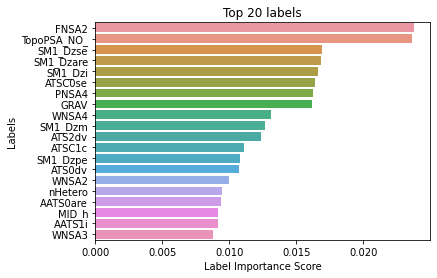

In [7]:
top_20 = feature_imp.nlargest(20)
sns.barplot(x=top_20, y=top_20.index)
plt.xlabel('Label Importance Score')
plt.ylabel('Labels')
plt.title("Top 20 labels")
plt.show()

### Remove labels with 0 label importance

In [8]:
X_train = X_train.loc[:, feature_imp[feature_imp!=0].axes[0].tolist()]
X_test = X_test.loc[:, feature_imp[feature_imp!=0].axes[0].tolist()]

X_train

,FNSA2,TopoPSA_NO_,SM1_Dzse,SM1_Dzare,SM1_Dzi,ATSC0se,PNSA4,GRAV,WNSA4,SM1_Dzm,...,SsCl,Mor21,JGI6,ETA_dPsi_B,JGI10,nFHRing,ATSC3v,Xc_6dv,Mor25p,CIC0
SMILES,,,,,,,,,,,,,,,,,,,,,
C1=CC(=CC=C1C(=O)O)[N+](=O)[O-],-0.767715,80.44,1.134242,1.328525,0.917786,2.972664,-14.619011,2042.071181,-4.732438,1.139562,...,0.0,-0.421608,0.040816,0.000000,0.000000,0,-250.379466,0.000000,0.365482,2.309478
CCCCCCCCCCCCCCCCO,-0.164160,20.23,0.248495,0.285714,0.173134,1.263522,-2.006400,1704.627767,-1.250653,0.249266,...,0.0,-2.141877,0.003711,0.000000,0.002361,0,-7.105679,0.000000,0.028001,4.646544
C1(C(O1)(F)F)(C(F)(F)F)F,-1.270169,12.53,2.129495,2.627178,2.295353,3.149698,-33.188443,2387.169619,-8.671861,2.455999,...,0.0,0.015365,0.000000,0.000000,0.000000,0,-24.128334,0.021166,0.025471,2.026466
CC(C)(C=C)O,-0.209484,20.23,0.248495,0.285714,0.173134,1.036660,-3.397234,595.110492,-0.881495,0.249266,...,0.0,-0.168095,0.000000,0.000000,0.000000,0,-833.495667,0.000000,0.068246,2.801808
C=CCC1=CC2=C(C=C1)OCO2,-0.491671,18.46,0.496990,0.571429,0.346268,1.882625,-7.888307,1869.582493,-2.784297,0.498531,...,0.0,-0.426127,0.023889,0.000000,0.000000,1,-327.083894,0.000000,0.481860,3.110844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCCS,-0.112203,0.00,0.071356,-0.024590,-0.086900,0.163932,-2.026929,441.365151,-0.549242,0.625359,...,0.0,-0.513904,0.000000,0.038212,0.000000,0,14.414443,0.000000,0.087918,2.747952
CCN(CC)CC,-0.084435,3.24,0.140263,0.185668,0.225250,0.398851,-1.147137,688.729833,-0.342869,0.142500,...,0.0,-0.822225,0.000000,0.000000,0.000000,0,233.556470,0.000000,0.299895,3.368779
C1=CC=C(C=C1)C(=O)C2=CC=CC=C2,-0.401193,17.07,0.248495,0.285714,0.173134,1.044981,-6.234910,2168.780768,-2.325509,0.249266,...,0.0,-0.646526,0.009796,0.000000,0.000000,0,-140.282779,0.000000,0.609370,3.388542


### Assess score

In [9]:
print("Test performance of Random Forest after removing labels")
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("ROC_AUC:",metrics.roc_auc_score(y_test, y_pred))

Test performance of Random Forest after removing labels
ROC_AUC: 0.9156097560975609


## Tuning the hyperparamaters 

In [10]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(clf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


### Define grid of hyperparamaters to search through

In [11]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 50)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 50)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20, 40, 60, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion 
criterion = ['gini', 'entropy']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap, 
               'criterion': criterion}

In [12]:
# Use the random grid to search for best hyperparameters
# Takes ~ 5 minutes to run 

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=clf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 10, 10, 10, 10, 11,
                                                      11, 11, 11, 11, 12, 12,
                                                      12, 12, 12, 13, 13, 13,
                                                      13, 13, 14, 14, 14, 14,
                                                      14, 15, 15, 15, 15, 15, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              40, 60, 100],
                                        'n_estimators': [10, 50, 91, 131, 172,
                                                         213, 253, 294, 334,
                                                         375, 416, 456, 497,
                                                         537, 578, 619, 659,
                                                         700, 741, 781, 822,
                                                         862, 903, 944, 984,
                                                         1025, 1065, 1106, 1147,
                                                         1187, ...]},
                   random_state=42, verbose=2)

In [13]:
rf_random.best_params_

{'n_estimators': 172,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 18,
 'criterion': 'entropy',
 'bootstrap': False}

In [15]:
print("Optimised test performance of Random Forest")
y_pred=rf_random.predict(X_test)
print("ROC_AUC:",metrics.roc_auc_score(y_test, y_pred))

Optimised test performance of Random Forest
ROC_AUC: 0.9278048780487804
